# Analysis of World Countries

# Content
- <a href='#1'>1. Introduction</a> 
- <a href='#2'>2. Data description</a> 
- <a href='#3'>3. Objectives</a> 
- <a href='#4'>4. Data manipulation and validation</a>
    - <a href='#4-1'>4.1 Data manipulation: cleaning and shaping</a>
    - <a href='#4-2'>4.2 Data validation: identify columns with missed values</a>
- <a href='#5'>5. Data analysis visualisation</a>
    - <a href='#5-1'>5.1 Countries With Low Birthrate & Low GDP</a>
    - <a href='#5-2'>5.2 Regional analysis of GDP per capita, net migration, and population</a>
    - <a href='#5-3'>5.3 Regional ranking analysis according to the average GDP per capita</a>
    - <a href='#5-4'>5.4 Relationship between GDP per capita and various factors</a>
    - <a href='#5-5'>5.5 Total GDP, and factors affecting on total GDP</a>
    - <a href='#5-6'>5.6 Make a model that can predict GDP per capita for each country</a> 
- <a href='#6'>6. Conclusion</a>    

# <a id='1'>1. Introduction</a>


In this project, I am investigating the dataset containing information on region, population, area, birthrate, deathrate, net migration and more of 227 countries. I will be focusing on the factors that affecting a country's GDP per capita and try to make a model using the data of 227 countries from the dataset. I will also briefly discuss the total GDPs. 

Gross domestic product (GDP) is a monetary measure of the market value of all the final goods and services produced in a specific time period. GDP per capita does not, however, reflect differences in the cost of living and the inflation rates of the countries; therefore, using a basis of GDP per capita at purchasing power parity is arguably more useful when comparing living standards between nations, while nominal GDP is more useful comparing national economies on the international market.

GDP can be determined in three ways, all of which should, theoretically, give the same result. They are the production (or output or value added) approach, the income approach, or the speculated expenditure approach.

The most direct of the three is the production approach, which sums the outputs of every class of enterprise to arrive at the total. The expenditure approach works on the principle that all of the product must be bought by somebody, therefore the value of the total product must be equal to people's total expenditures in buying things. The income approach works on the principle that the incomes of the producers must be equal to the value of their product, and determines GDP by finding the sum of all producers' incomes.

References: https://en.wikipedia.org/wiki/Gross_domestic_product

# <a id='2'>2. Data description </a>

I am investigating the dataset "Countries of the World"  from kaggle: https://www.kaggle.com/fernandol/countries-of-the-world.
This dataset has each country as a data point (227 countries in total), and for each, we have 20 columns, each column represents a different aspect or measure of the specific country. 
Below is data that we will be used for our analysis:
+ Country - name of countries
+ Region - geographic regions of the world
+ Population - the total number of humans currently living                           
+ Area (sq. mi.) - territories of eech country, in square miles                    
+ Pop. Density (per sq. mi.) -  the number of people per square mile          
+ Coastline (coast/area ratio) - the area where land meets the sea, a coastline of zero indicates that the country is landlocked.         
+ Net migration - difference between the number of immigrants (people coming into an area) and the number of emigrants (people leaving an area) throughout the year.                       
+ Infant mortality (per 1000 births) - this death toll shows the number of deaths of children under one year of age per 1000 live births. 
+ GDP ($ per capita)- is a metric that breaks down a country's economic output per person and is calculated by dividing the GDP of a country by its population.                  
+ Literacy (%) - percentage of population aged 15 years and over who can both read and write   

+ Phones (per 1000) - the total number of mobile cellular telephones in use per 1000 people                 
+ Arable (%)- percent of land capable of being ploughed and used to grow crops               

+ Crops (%) - percentage of plant  that can be grown and harvested extensively for profit or subsistence  
+ Other (%) - percentage of other areas that generate income for the country                           
+ Climate - climatic zone to which the country belongs                             
+ Birthrate - shows the average annual number of births during a year per 1,000 persons in the population 

+ Deathrate - shows the average annual number of deaths during a year per 1,000 persons in the population 

+ Agriculture - the percentage of the agriculture sector in the economic activity of each country.                
+ Industry -  the percentage of the industry sector in the economic activity of each country.                    
+ Service -  the percentage of the service sector in the economic activity of each country.       



# <a id='3'>3. Objectives </a>

The goal of the project is to understand this dataset, get some insights from it. 
Also, the analysis includes the following research:
1. Countries With Low Birthrate & Low GDP
2. Regional analysis of GDP per capita, net migration, and population
3. Regional ranking analysis according to the average GDP per capita
4. Relationship between GDP per capita and various factors
5. Total GDP, and factors affecting on total GDP
6. Make a model that can predict GDP per capita for each country

# <a id='4'>4. Data manipulation and validation</a>

### <a id='4-1'>4.1 Data manipulation: cleaning and shaping</a>

In [2]:
import numpy as np # for linear algebra
import pandas as pd # for data processing, csv io
from matplotlib import pyplot as plt # data plots
import seaborn as sns # pretty data plots
sns.set()

from sklearn.preprocessing import LabelEncoder # for label normalization
from sklearn.model_selection import train_test_split # for splitting data into train and test subsets
from sklearn.linear_model import LinearRegression # for using Linear Regression model
from sklearn.metrics import mean_squared_error, mean_squared_log_error

##### Data Import

In [3]:
df = pd.read_csv('world_countries.csv')

##### Show data header

In [4]:
df.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


##### Data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

Here we see an issue. Except for 'Country' and 'Region', all other columns are numerical, yet only 'Population', 'Area', and 'GDP' are int/float type. While the rest (15/20) are identified as object type. <br> We need to convert those into float type, to avoid an error or some unexpected results. Because an object is a string in pandas so it performs a string operation instead of a mathematical one.  <br>
Also, column names are very long, We have to fix them as well. 

##### Fix column names

Many columns in the dataset have long names, we will change them to be shorter and better describtive.

In [6]:
df.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality",
                 "gdp_per_capita", "literacy","phones","arable","crops","other","climate","birthrate",
                 "deathrate","agriculture","industry", "service"])

##### Fix data types

Many columns in that dataset have _object_ as type. We will fix this by assigning float/string types to them. 

In [7]:
df.country = df.country.astype('category')

df.region = df.region.astype('category')

df.density = df.density.astype(str)
df.density = df.density.str.replace(",",".").astype(float)

df.coastline_area_ratio = df.coastline_area_ratio.astype(str)
df.coastline_area_ratio = df.coastline_area_ratio.str.replace(",",".").astype(float)

df.net_migration = df.net_migration.astype(str)
df.net_migration = df.net_migration.str.replace(",",".").astype(float)

df.infant_mortality = df.infant_mortality.astype(str)
df.infant_mortality = df.infant_mortality.str.replace(",",".").astype(float)

df.literacy = df.literacy.astype(str)
df.literacy = df.literacy.str.replace(",",".").astype(float)

df.phones = df.phones.astype(str)
df.phones = df.phones.str.replace(",",".").astype(float)

df.arable = df.arable.astype(str)
df.arable = df.arable.str.replace(",",".").astype(float)

df.crops = df.crops.astype(str)
df.crops = df.crops.str.replace(",",".").astype(float)

df.other = df.other.astype(str)
df.other = df.other.str.replace(",",".").astype(float)

df.climate = df.climate.astype(str)
df.climate = df.climate.str.replace(",",".").astype(float)

df.birthrate = df.birthrate.astype(str)
df.birthrate = df.birthrate.str.replace(",",".").astype(float)

df.deathrate = df.deathrate.astype(str)
df.deathrate = df.deathrate.str.replace(",",".").astype(float)

df.agriculture = df.agriculture.astype(str)
df.agriculture = df.agriculture.str.replace(",",".").astype(float)

df.industry = df.industry.astype(str)
df.industry = df.industry.str.replace(",",".").astype(float)

df.service = df.service.astype(str)
df.service = df.service.str.replace(",",".").astype(float)

Now, let's check our new data types and column names:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

Now that looks good.

##### Show statistical analysis of our data set

Let's show min, max, mean, std, and count of each column in the dataset. 

In [9]:
df.describe()

,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


##### Invistigating undefined features

We need to understand what different values in the Climate, agriculture, industry, and service columns refer to.

In [10]:
df.loc[:, ['country', 'region', 'climate', 'agriculture', 'industry', 'service']].head()

,country,region,climate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),1.0,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3.0,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,1.0,0.101,0.600,0.298
3,American Samoa,OCEANIA,2.0,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,3.0,NaN,NaN,NaN


It is clear here that the values in (agriculture, industry, and service) columns are the percentages those different sectors in the economic activity in each country.
For example: agriculture is generating 38% of Afganistan's GDP, industry generates 24%, while service generates 38%; the total is 100%.

Now we still have to understand the climate column, let's continue our invistigation:

In [11]:
df.climate.unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

In [12]:
h1 = df.loc[:, ['country', 'region', 'climate']][df.climate == 1].head()
h2 = df.loc[:, ['country', 'region', 'climate']][df.climate == 2].head()
h3 = df.loc[:, ['country', 'region', 'climate']][df.climate == 3].head()
h4 = df.loc[:, ['country', 'region', 'climate']][df.climate == 4].head()
h5 = df.loc[:, ['country', 'region', 'climate']][df.climate == 1.5].head()
h6 = df.loc[:, ['country', 'region', 'climate']][df.climate == 2.5].head()
pd.concat([h1, h2, h3, h4, h5, h6])

,country,region,climate
0,Afghanistan,ASIA (EX. NEAR EAST),1.0
2,Algeria,NORTHERN AFRICA,1.0
11,Australia,OCEANIA,1.0
13,Azerbaijan,C.W. OF IND. STATES,1.0
15,Bahrain,NEAR EAST,1.0
3,American Samoa,OCEANIA,2.0
6,Anguilla,LATIN AMER. & CARIB,2.0
7,Antigua & Barbuda,LATIN AMER. & CARIB,2.0
10,Aruba,LATIN AMER. & CARIB,2.0
14,"Bahamas, The",LATIN AMER. & CARIB,2.0


So, along with nan (representing missing data), climate has 6 unique values, and they are: 1, 1.5, 2, 2.5, 3, and 4. our observations:

1. Countries with mostly desert/hot climate have 1
2. Countries with mostly tropical climate have 2
3. Countries with mostly cold/cool Climate have 3
4. Countries with Climate almost equally divided between hot and tropical have 1.5
5. Countries with Climate almost equally divided between cold and tropical have 2.5
6. Countries under 'Climate' = 4, are also belonging to cold/cool climate group; It is not metioned in the dataset source why this group is separate from group 3 ; yet we will compine both groups together in the data cleaning section of the project.
7. There are 22 countries with null values for the climate column, those will be replaces by 0 in a later step, where 0 will represent 'unknown' value.

### <a id='4-2'>4.2 Data validation: identify columns with missed values</a>

In [13]:
print('Number of missing data:')
print(df.isnull().sum())
df.describe(include='all')

Number of missing data:
country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            3
infant_mortality         3
gdp_per_capita           1
literacy                18
phones                   4
arable                   2
crops                    2
other                    2
climate                 22
birthrate                3
deathrate                4
agriculture             15
industry                16
service                 15
dtype: int64


,country,region,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Zimbabwe,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


[Text(30.5, 0.5, 'Data Points'),
 Text(0.5, 12.453125, 'Columns'),
 Text(0.5, 1.0, 'Missing Data')]

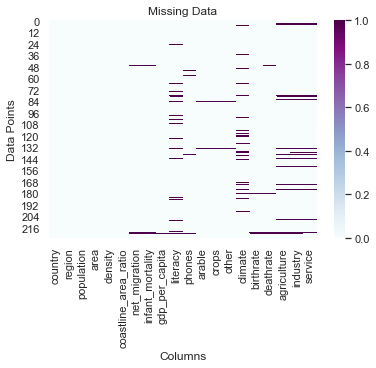

In [14]:
sns.heatmap(df.isnull(), cmap="BuPu").set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

I noticed that there are some missing data points in the table, but it is not extensive.
14/20 of our columns have missing data points, the maximum percentage of missing data is in the 'Climate' column, and it is less than 10% (22/227).


For simplicity, I will just fill the missing data using the mean of the region that a country belongs, as countries that are close geologically are often similar in many ways. For example, lets check the region median of 'GDP ($ per capita)', 'Literacy (%)', 'birthrate' and 'deathrate'. 

In [15]:
df.groupby('region')[['gdp_per_capita','literacy','birthrate', 'deathrate']].median()

,gdp_per_capita,literacy,birthrate,deathrate
region,,,,
ASIA (EX. NEAR EAST),3450.0,90.60,19.565,6.960
BALTICS,11400.0,99.80,9.240,13.250
C.W. OF IND. STATES,3450.0,99.05,15.850,9.325
EASTERN EUROPE,9100.0,98.60,9.720,10.310
LATIN AMER. & CARIB,6300.0,94.05,18.020,6.090
NEAR EAST,9250.0,83.00,21.595,4.560
NORTHERN AFRICA,6000.0,70.00,21.980,5.130
NORTHERN AMERICA,29800.0,97.50,13.520,7.800
OCEANIA,5000.0,95.00,22.320,5.690


I will fill the missing data in the following way:
1. Net_migration: 3 missing data points. all of them belong to very small nations. We will put zero for those 3. 
2. Infant_mortality: 3 missing data points. all of them belong to very small nations. We will put zero for those 3. 
3. Gdp_per_capita: 1 missing value. West Sahara, from internet search, their gdp per capita is $2500, and we will put this value into our data set. 
4. Literacy %: 18 missing values, replaces by the mean literacy of each missing value's region.
5. Phones: 4 missing values, replaces by the mean phones of each missing value's region.
6. Arable, crops, and other: 2 missing values of very small islands, replace with zero.
7. Climate: 22 missing, replace with 0, where zero will represent a 'unknown' value. 
8. Birthrate, and deathrate: 3 missing, replace with their region's mean rates, since those rates are per 1000, and not population related. 
9. Agricultue, industry, and service: 15 missing values, all belong to very small island nations. After inspection for similar nations, I have found that those kind of nations usually have economies that rely heavily on services, with some agricultural and industrial activities. So I will replace the missing values with the following: agricultue = 0.15, industry = 0.05. service = 0.8. 

In [16]:
df['net_migration'].fillna(0, inplace=True)
df['infant_mortality'].fillna(0, inplace=True)
df['gdp_per_capita'].fillna(2500, inplace=True)
df['literacy'].fillna(df.groupby('region')['literacy'].transform('mean'), inplace= True)
df['phones'].fillna(df.groupby('region')['phones'].transform('mean'), inplace= True)
df['arable'].fillna(0, inplace=True)
df['crops'].fillna(0, inplace=True)
df['other'].fillna(0, inplace=True)
df['climate'].fillna(0, inplace=True)
df['birthrate'].fillna(df.groupby('region')['birthrate'].transform('mean'), inplace= True)
df['deathrate'].fillna(df.groupby('region')['deathrate'].transform('mean'), inplace= True)
df['agriculture'].fillna(0.17, inplace=True)
df['service'].fillna(0.8, inplace=True)
df['industry'].fillna((1 - df['agriculture'] - df['service']), inplace= True)

Now, let's check our missing data: 

In [17]:
print(df.isnull().sum())

country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64


No missing data anymore.

# <a id='5'>5. Data analysis ana visualization</a>

### <a id='5-1'>5.1 Countries With Low Birthrate & Low GDP</a>

In [20]:
df2=df[df['birthrate']<12][df[df['birthrate']<12]['gdp_per_capita']<10000].reset_index()
df2

,index,country,region,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,...,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,...,319.1,29.55,0.60,69.85,4.0,11.160000,14.020000,0.093,0.316,0.591
1,25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,...,215.4,13.60,2.96,83.44,4.0,8.770000,8.270000,0.142,0.308,0.550
2,30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,...,336.3,40.02,1.92,58.06,3.0,9.650000,14.270000,0.093,0.304,0.603
3,51,Cuba,LATIN AMER. & CARIB,11382820,110860,102.7,3.37,-1.58,6.33,2900.0,...,74.7,33.05,7.60,59.35,2.0,11.890000,7.220000,0.055,0.261,0.684
4,75,Georgia,C.W. OF IND. STATES,4661473,69700,66.9,0.44,-4.70,18.59,2500.0,...,146.6,11.44,3.86,84.70,3.0,10.410000,9.230000,0.172,0.275,0.553
5,168,Romania,EASTERN EUROPE,22303552,237500,93.9,0.09,-0.13,26.43,7000.0,...,196.9,40.82,2.25,56.93,3.0,10.700000,11.770000,0.101,0.350,0.549
6,169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,...,280.6,7.33,0.11,92.56,0.0,9.950000,14.650000,0.054,0.371,0.575
7,181,Serbia,EASTERN EUROPE,9396411,88361,106.3,0.00,-1.33,12.89,2200.0,...,285.8,33.35,3.20,63.45,0.0,10.370909,10.284545,0.166,0.255,0.579
8,211,Ukraine,C.W. OF IND. STATES,46710816,603700,77.4,0.46,-0.39,20.34,5400.0,...,259.9,56.21,1.61,42.18,3.0,8.820000,14.390000,0.187,0.452,0.361


Let's look at the countries with low birthrate (<12%) and low GDP per capita (<10000 $). They also have hight literacy, like other high average GDP countires. But we hope their other features can help distiguish them from those with low birthrate but high average GDPs, like service are not quite an importent portion in their economy, not a lot phone procession, some have negative net migration. And many of them are from Eastern Europe or former Soviet Union countries, so the 'region' feature may also affect.

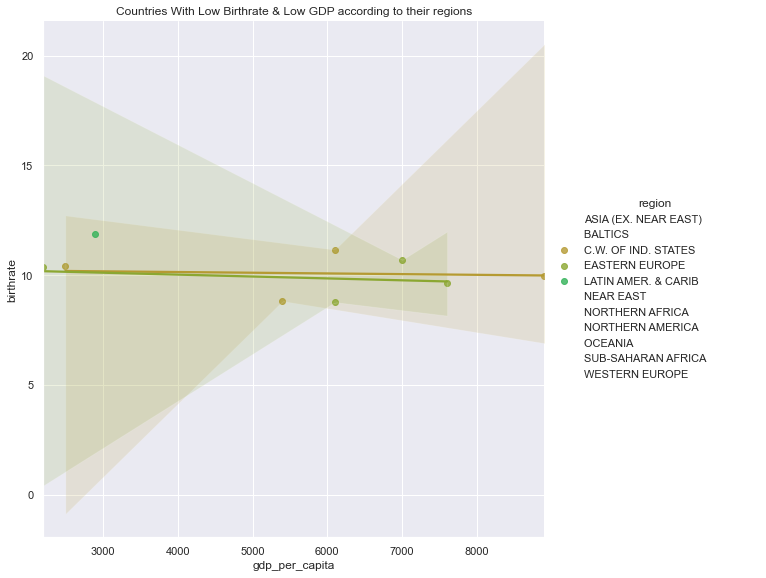

In [37]:

ax=sns.lmplot(x = 'gdp_per_capita', y = 'birthrate' ,hue='region', data = df2, height=8).set(title='Countries With Low Birthrate & Low GDP according to their regions')


### <a id='5-2'>5.2 Regional analysis of GDP per capita, net migration, and population</a>


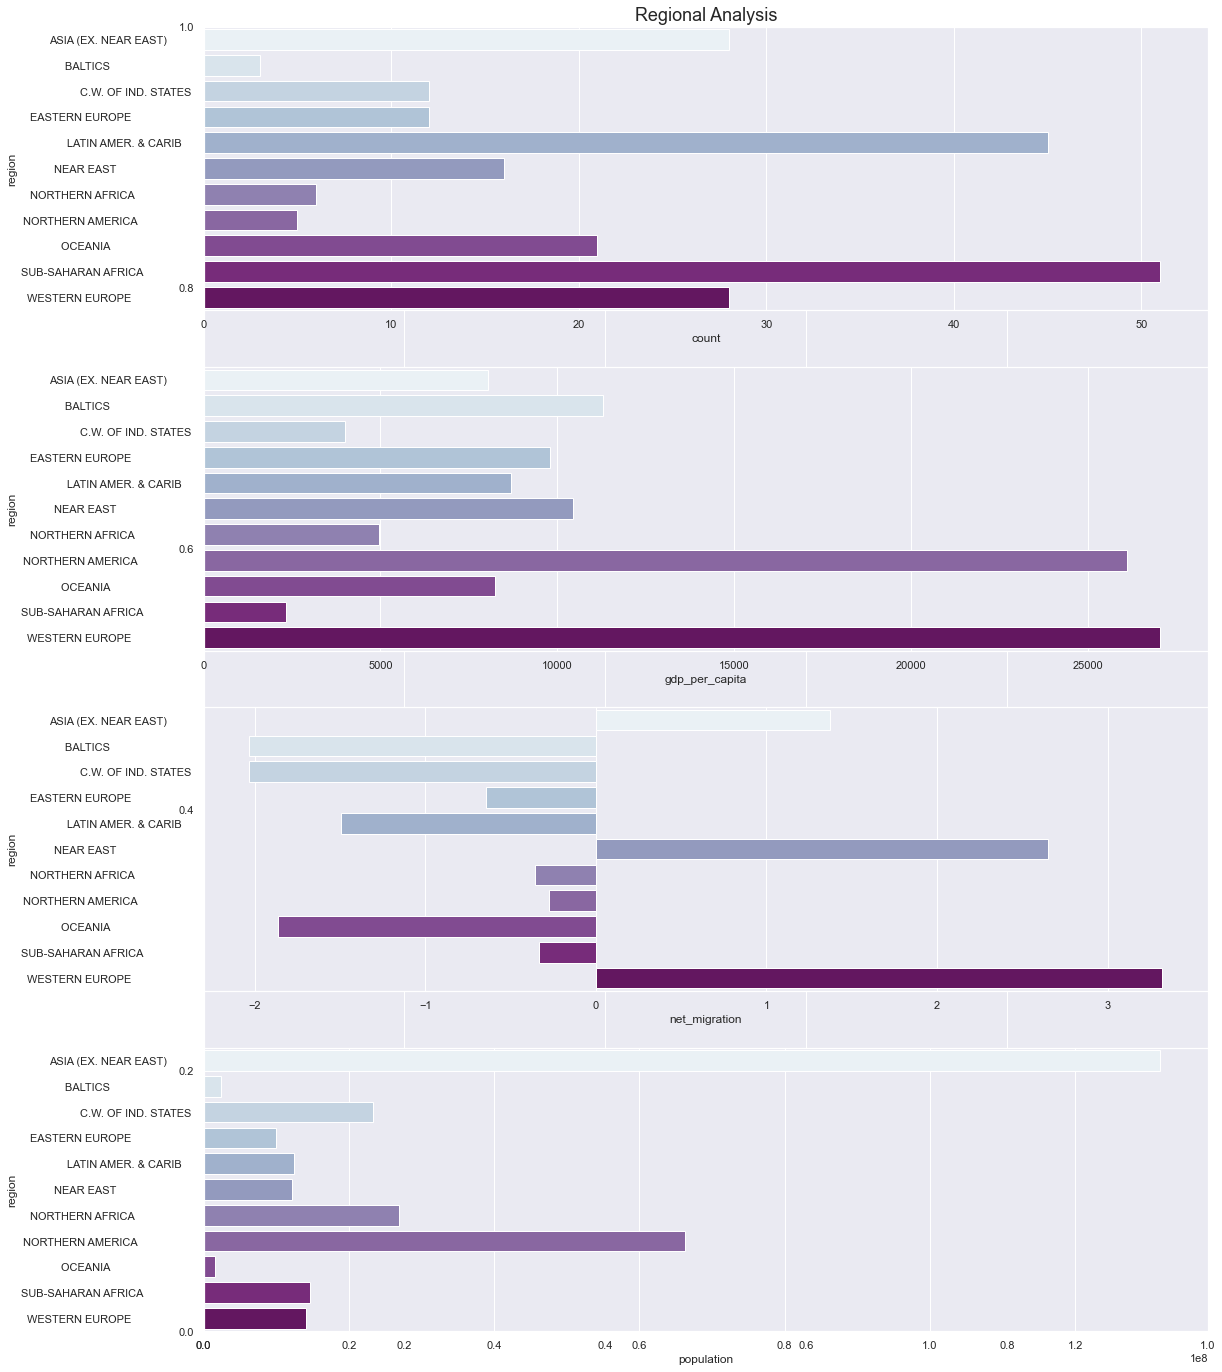

In [18]:
fig = plt.figure(figsize=(18, 24))
plt.title('Regional Analysis', size=18)
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
sns.countplot(data=df, y='region', ax= ax1, palette='BuPu')
sns.barplot(data=df, y='region', x='gdp_per_capita', ax= ax2, palette='BuPu', ci= None)
sns.barplot(data=df, y='region', x='net_migration', ax= ax3, palette='BuPu', ci= None)
sns.barplot(data=df, y='region', x='population', ax= ax4, palette='BuPu', ci= None)
plt.show()

From the above graphs, we can notice the following:
Latin America and Sub-Saharian Africa regions have the most countries whithen them.
Western Europe and North America have the highest GDP per capita, while Sub-Saharian Africa has the lowest GDP per capita.
Asia, North America, and North Europe, are the main regions where migrants from other regions go.
Asia has the largest population, Oceania has the smallest.

### <a id='5-3'>5.3 Regional ranking analysis according to the average GDP per capita</a>
   

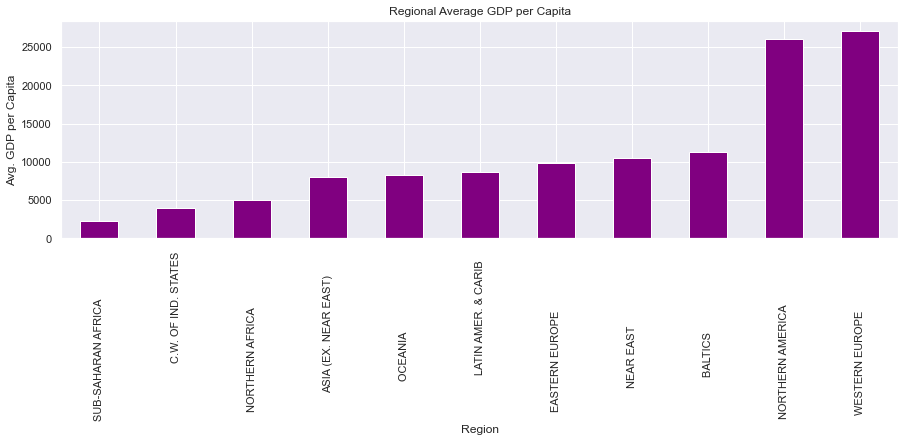

In [110]:
fig = plt.figure(figsize=(15, 4))
df.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar', color='purple')
plt.title('Regional Average GDP per Capita')
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel('Avg. GDP per Capita')
plt.show()

The figure above shows the regional ranking according to the average GDP per capita. As expected, North America and Western Europe have the highest GDP per capita, while Sub Saharian Africa has the lowest, and that may describes the large migration trends in the world in the past decade.

### <a id='5-4'>5.4 Relationship between GDP per capita and various factors</a>
   

Now, we will look at correlation of features. Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. For that we will use heat map. A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.

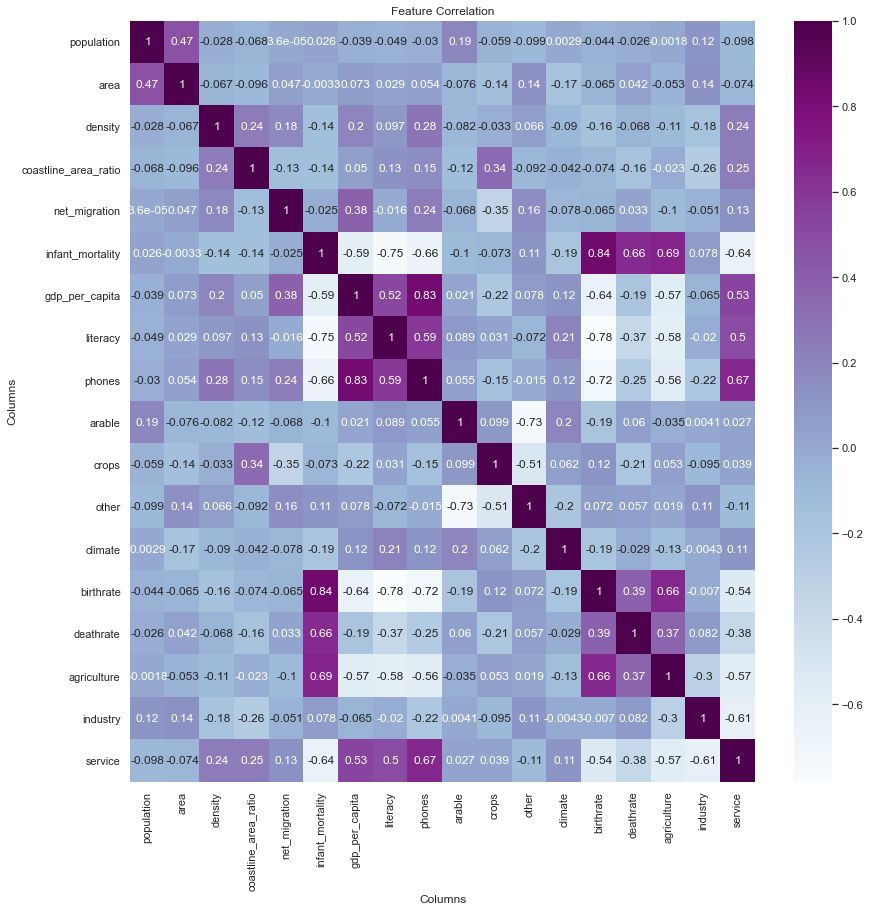

In [20]:
fig, ax = plt.subplots(figsize=(14,14)) 
sns.heatmap(df.corr(), annot=True, ax=ax, cmap="BuPu").set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

Some insights from the above graph:
    
expected stronge correlation between infant_mortality and birthrate

expected stronge correlation between infant_mortality and literacy

expected stronge correlation between gdp_per_capita and phones

expected stronge correlation between birthrate and literacy (the less literacy the higher the birthrate)

unexpected stronge correlation between birthrate and phones

unexpected stronge correlation between infant_mortality and agriculture



Let's now show correlation among a few of our features. 
We pick the six columns that mostly correlated to GDP per capita and make scatter plots. The results agree with our common sense. Also we notice there are many countries with low average GDP and few with high average GDP we can understand it by a pyramid structure.

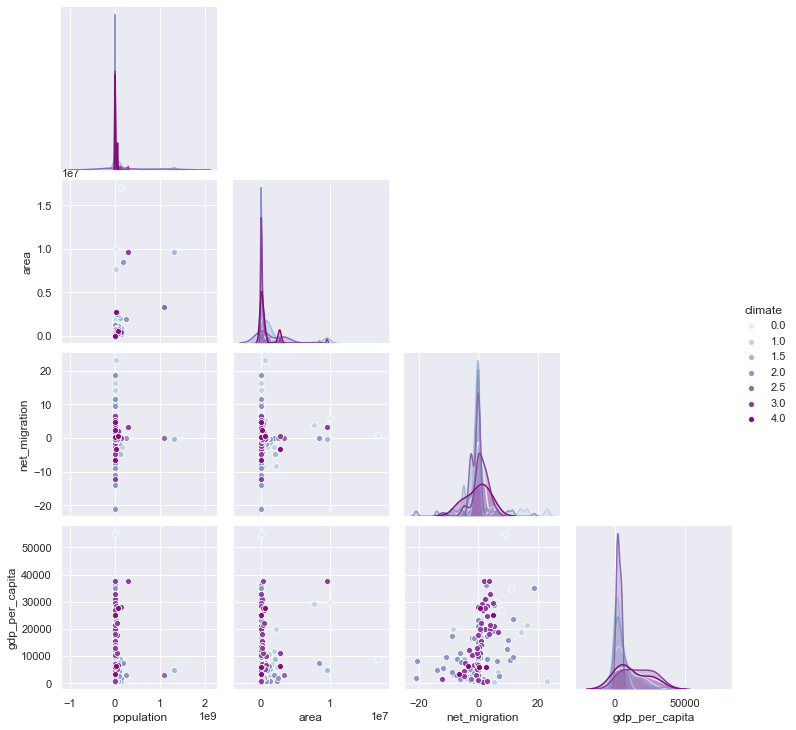

In [41]:
g = sns.pairplot(df[['population', 'area', 'net_migration', 'gdp_per_capita', 'climate']],hue='climate', palette='BuPu',corner=True)


We can see a fair correlation between GDP and migration, which makes sense, since migrants tend to move to countries with better opportunities and higher GDP per capita.

Now let's try to find the relationship between infant nortality and GDP per capita

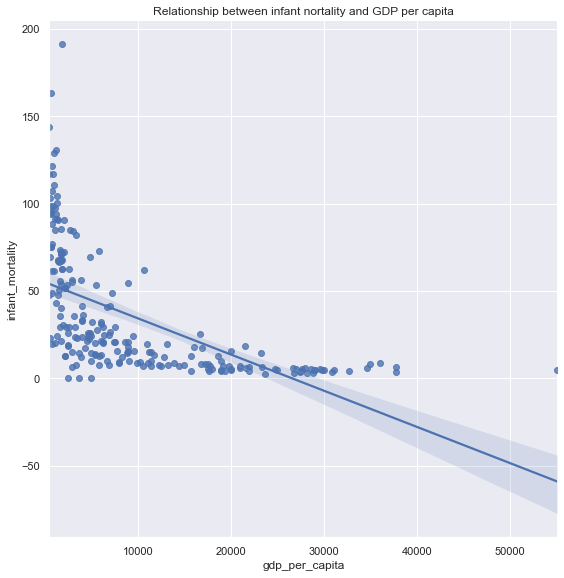

In [43]:
sns.lmplot(x = 'gdp_per_capita' , y = 'infant_mortality' , data = df, height=8).set(title='Relationship between infant nortality and GDP per capita')

As it can be inferred by looking at the scatterplot that there is a good enough relation between the infant mortality and gdp per capita of the country. And the relation between this factors is negative.

Let's try to understand this relation more with the help of hexplot

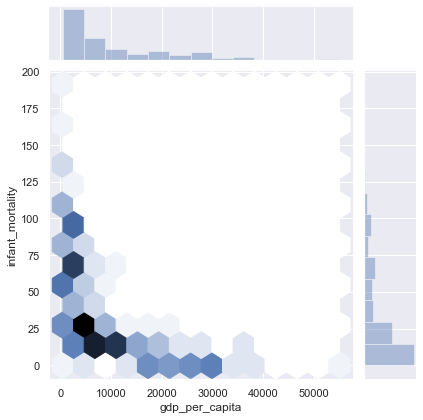

In [45]:
sns.jointplot(x = 'gdp_per_capita' , y = 'infant_mortality' , kind = 'hex' , data = df)

From the hexplot we can see that many lower infant mortality rate values corresponds to lower per capita GDP. Hence we can conclude that negative relation between the above two variables is not that strong.

### <a id='5-5'>5.5 Total GDP and factors affecting on total GDP</a>
   

It is also interesting to look at the total GDPs, which I take as 'gdp_per_capita' × 'population'.


In [47]:
df['Total_GDP'] = df['gdp_per_capita'] * df['population']

Here are the top 10 countries with highest total GDPs, their GDP make up to about 2/3 of the global GDP.

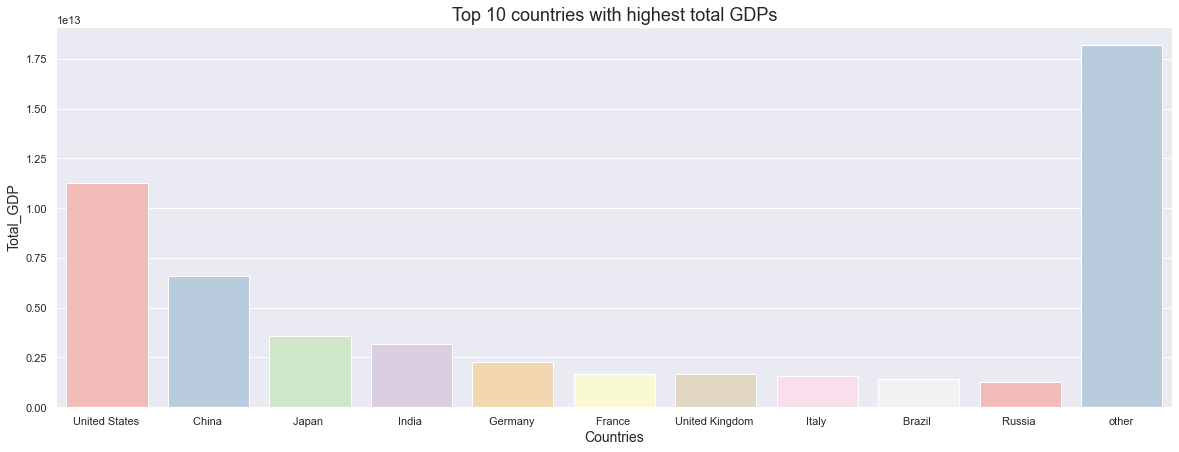

In [76]:
top_gdp_countries = df.sort_values('Total_GDP',ascending=False).head(10)
other = pd.DataFrame({'country':['other'], 'Total_GDP':[df['Total_GDP'].sum() - top_gdp_countries['Total_GDP'].sum()]})
gdps = pd.concat([top_gdp_countries[['country','Total_GDP']],other],ignore_index=True)

fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(x='country',y='Total_GDP',data=gdps,ax=ax,palette='Pastel1').set(xlabel='country', ylabel='Total_GDP')
plt.xlabel("Countries", size=14)
plt.ylabel("Total_GDP", size=14)
plt.title("Top 10 countries with highest total GDPs", size=18)
plt.show()
 

Now we will compare the ten countries rank in total GDP and GDP per capita

In [73]:
Rank1 = df[['country','Total_GDP']].sort_values('Total_GDP', ascending=False).reset_index()
Rank2 = df[['country','gdp_per_capita']].sort_values('gdp_per_capita', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('Rank of total GDP - Rank of GDP per capita:')
Rank_change.loc[top_gdp_countries.country]

Rank of total GDP - Rank of GDP per capita:


country
United States        1
China              119
Japan               14
India              147
Germany             15
France              15
United Kingdom      12
Italy               17
Brazil              84
Russia              75
dtype: int64

We observe that the countries with high total GDPs are quite different from those with high GDP per capita.
For example, China and India jump above a lot when it comes to the total GDP.
The only country that is on top of both total and average GDPs is the United States.

Now, we will check the correlation between total GDP and the other columns. The top two factors affectinf on total GDP are population and area, following many factors that have also been found mostly correlated to GDP per capita.

In [108]:
corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='Total_GDP')&(col!='Climate')&(col!='gdp_per_capita')):
        corr_to_gdp[col] = df['Total_GDP'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]
print(corr_to_gdp)

population              0.639529
area                    0.556396
phones                  0.233043
birthrate              -0.166855
agriculture            -0.148164
arable                  0.131387
infant_mortality       -0.119790
literacy                0.102250
climate                 0.096708
crops                  -0.076939
service                 0.067651
industry                0.065395
coastline_area_ratio   -0.065209
net_migration           0.054547
other                  -0.048232
deathrate              -0.035790
density                -0.028486
dtype: float64


<ipython-input-108-8c9ac8ea8af8>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_to_gdp = pd.Series()


Let's do a comparison of the agriculture, industry and service for the ten countries with hightest total GDP. And on the figure below we can see that service affecting more. In the case of china, the industry is more profitable. Less affecting is agriculture.

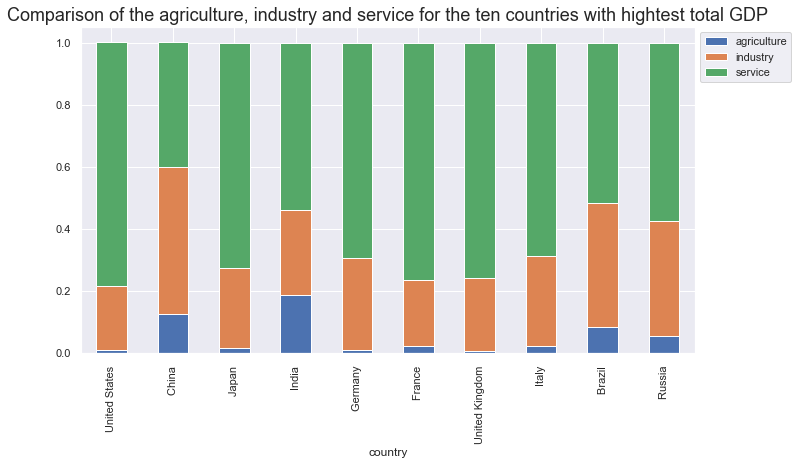

In [61]:
plot_df = top_gdp_countries.head(10)[['country','agriculture', 'industry', 'service']]

plot_df = plot_df.set_index('country')
ax = plot_df.plot.bar(stacked=True,figsize=(11,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.title("Comparison of the agriculture, industry and service for the ten countries with hightest total GDP", size=18)
plt.show()

 ### <a id='5-6'>5.6 Make a model that can predict GDP per capita for each country</a> 

#### Data Pre-Conditioning

In this part we will make our data ready for model training. This will include:
Transform 'region' column into numerical values.
Split data set into training and testing parts (80/20), while dropping the countries column (string, and not going to be used to train the models), and separating gdp_per_capita column, where it will be used as labels.
We will try different splits of our dataset (with/without feature selection, with/without feature scaling.

Firstly, transform 'region' column into numerical values.

In [63]:
df_final = pd.concat([df,pd.get_dummies(df['region'], prefix='region')],
                     axis=1).drop(['region'],axis=1)
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   country                                     227 non-null    category
 1   population                                  227 non-null    int64   
 2   area                                        227 non-null    int64   
 3   density                                     227 non-null    float64 
 4   coastline_area_ratio                        227 non-null    float64 
 5   net_migration                               227 non-null    float64 
 6   infant_mortality                            227 non-null    float64 
 7   gdp_per_capita                              227 non-null    float64 
 8   literacy                                    227 non-null    float64 
 9   phones                                      227 non-null    float64 
 10  ar

Now let's see how the regions are displayed

In [64]:
df_final.head()

,country,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,0,0,0,0,0,0,0,0,0,0
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,0,0,1,0,0,0,0,0,0,0
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,0,0,0,0,0,1,0,0,0,0
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,0,0,0,0,0,0,0,1,0,0
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,0,0,0,0,0,0,0,0,0,1


We can’t just randomly apply the linear regression algorithm to our data. We have to make sure it’s a good fit. For this, we have to do some data analysis. But first, the ever important importing and loading of data. 

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression

Before we start exploring our data, we should split it up into two different data frames to work with.

Why do we need to split our data in the first place? The short answer is to take a small set of our data so we can test our model and see how well it performs on data that it hasn’t “seen” yet. Also, we need to split our features or y-array('gdp_per_capita','country','population', 'area', 'coastline_area_ratio', 'arable', 'crops', 'other', 'climate', 'deathrate', 'industry' from our label or x-array ('gdp_per_capita','country').



Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Data Split 1: all of our final dataset, no scaling

In [66]:
y = df_final['gdp_per_capita']
X = df_final.drop(['gdp_per_capita','country'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Data Split 2: all of our final dataset, with scaling

In [67]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

Data Split 3: feature selected dataset, no scaling

We will select only a portion of our features, the ones with corelation score larger than -/+ 0.3 with gdp_per_capita. 

In [68]:
y3 = y
X3 = df_final.drop(['gdp_per_capita','country','population', 'area', 'coastline_area_ratio', 'arable',
                      'crops', 'other', 'climate', 'deathrate', 'industry'], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

Data Split 4: feature selected dataset, with scaling

In [69]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). In our case, we will predict the gdp_per_capita for each country

Now we can create our model with our training data.

Model Training

In [70]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

lm4 = LinearRegression()
lm4.fit(X4_train,y4_train)

LinearRegression()

Predictions

In [71]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)
lm3_pred = lm3.predict(X3_test)
lm4_pred = lm4.predict(X4_test)

Evaluation

In this part, I am going to show the Linear Regression Performance, which includes:
+ The mean absolute error (MAE) is the simplest regression error metric to understand. We’ll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals. 

+ The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. Because we are squaring the difference, the MSE will almost always be bigger than the MAE. For this reason, we cannot directly compare the MAE to the MSE. We can only compare our model’s error metrics to those of a competing model. 

+ R^2 (coefficient of determination) regression score function. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

Then, we will plot the graph for linear regression

Linear Regression Performance:

all features, No scaling:
MAE: 321949.9497517282
RMSE: 1530112.740907117
R2_Score:  -28333.76512931269

all features, with scaling:
MAE: 662279608184939.2
RMSE: 858989903190420.4
R2_Score:  -8.929946813945446e+21

selected features, No scaling:
MAE: 2974.300514594873
RMSE: 4070.7965778778475
R2_Score:  0.7994458949883533

selected features, with scaling:
MAE: 2877.206958164319
RMSE: 3756.659419503232
R2_Score:  0.8292045089714146


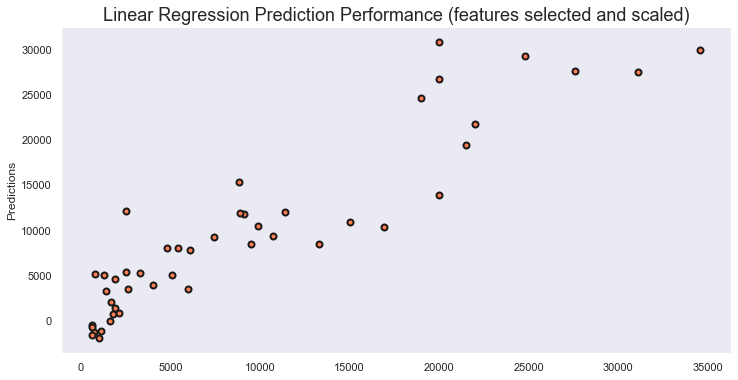

In [72]:

print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, lm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, lm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, lm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, lm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, lm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, lm4_pred))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,lm4_pred,color='coral', linewidths=2, edgecolors='k')

plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)', size=18) 
plt.grid()
plt.show()


From the metrics above, it is clear that feature selection is essential for linear regression model training, in order to get acceptable results on this dataset. On the other hand, feature scaling has a small positive effect on linear regressions prediction performance. We got decent prediction performance from Linear Regression with feature selection and scaling.

# <a id='6'>6. Conclusion</a>

It was a wonderful learning experience for me while working on this project. This project took me through the various phases of project development and gave me insight into factors that consist of the GDP of the countries.

In this project, I investigated the dataset containing information on the region, population, area, birthrate, death rate, net migration, and more of 227 countries. I have focused on the factors that affect a country's GDP per capita and make a model using the data of 227 countries from the dataset. As a result of the analysis, I received insights into the questions posed. Here you can find bits of knowledge taken from these questions:

+ Countries With Low Birthrate & Low GDP. Such countries also have hight literacy, like other high average GDP countires. But we hope their other features can help distiguish them from those with low birthrate but high average GDPs, like service are not quite an importent portion in their economy, not a lot phone procession, some have negative net migration. And many of them are from Eastern Europe or former Soviet Union countries, so the 'region' feature may also affect.
+ Regional analysis of GDP per capita, net migration, and population. We can notice the following: Latin America and Sub-Saharian Africa regions have the most countries whithen them. Western Europe and North America have the highest GDP per capita, while Sub-Saharian Africa has the lowest GDP per capita. Asia, North America, and North Europe, are the main regions where migrants from other regions go. Asia has the largest population, Oceania has the smallest. 
+ Regional ranking analysis according to the average GDP per capita. As expected, North America and Western Europe have the highest GDP per capita, while Sub Saharian Africa has the lowest, and that may describes the large migration trends in the world in the past decade.
+ Relationship between GDP per capita and various factors. Fristly, migrants tend to move to countries with better opportunities and higher GDP per capita. Secondly, the relation between the infant mortality and GDP per capita of the country is negative. Thirdly, many lower infant mortality rate values corresponds to lower per capita GDP. Hence we can say that negative relation between the above two variables is not that strong. 
+ Total GDP, and factors affecting on total GDP. We observe that the countries with high total GDPs are quite different from those with high GDP per capita. For example, China and India jump above a lot when it comes to the total GDP. The only country that is on top of both total and average GDPs is the United States.
+ Model that can predict GDP per capita for each country. From the metrics that we got, it is clear that feature selection is essential for linear regression model training, in order to get acceptable results on this dataset. On the other hand, feature scaling has a small positive effect on linear regressions prediction performance. We got decent prediction performance from Linear Regression with feature selection and scaling